### Code/Graphs from Assessment 8

In [77]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from scipy.signal import welch
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.dates as mdates

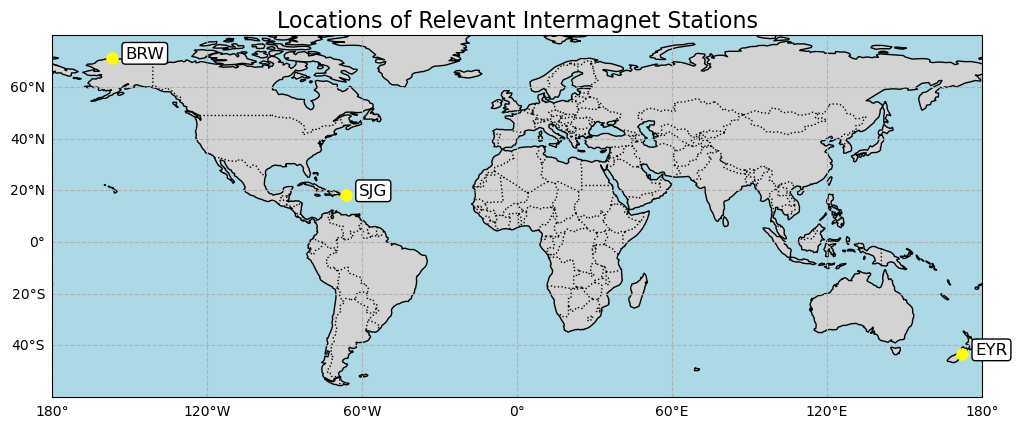

In [36]:
# Define coordinates: (longitude, latitude)
locations = [
    ("BRW", -156.62, 71.32),    # Barrow, Alaska
    ("SJG", -66.15, 18.11),    # San Juan, Puerto Rico
    ("EYR", 172.393, -43.474)  # Eyrewell, New Zealand
]

# Set up the global map with Plate Carrée projection
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.set_extent([-180, 180, -60, 80], crs=ccrs.PlateCarree())

# Add base map features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Add gridlines with labels
gl = ax.gridlines(draw_labels=True, linestyle="--")
gl.top_labels = False
gl.right_labels = False

# Plot points and labels
for name, lon, lat in locations:
    ax.plot(lon, lat, marker='o', color='yellow', markersize=8, transform=ccrs.PlateCarree())
    ax.text(lon + 5, lat, name,
        transform=ccrs.PlateCarree(),
        fontsize=12,
        color='black',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))


# Show the plot
plt.title("Locations of Relevant Intermagnet Stations", fontsize=16)
plt.show()

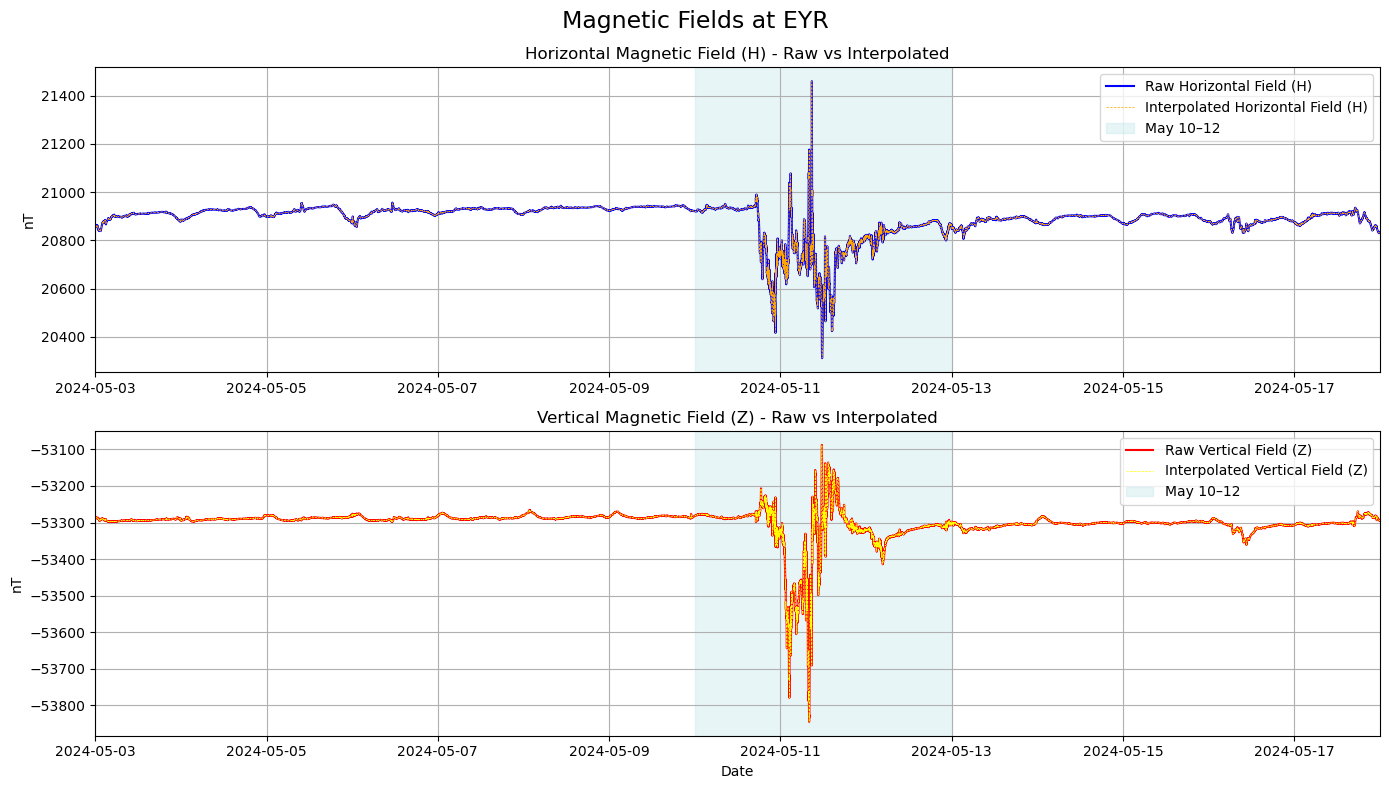

In [85]:
# Load the JSON data
with open("intermag-data/EYR20240503.json", "r") as f:
    raw_data = json.load(f)

# Extract relevant fields
times = [datetime.fromisoformat(t.replace("Z", "")) for t in raw_data["datetime"]]  # Convert datetime strings to datetime objects
X = np.array(raw_data["X"], dtype=float)
Y = np.array(raw_data["Y"], dtype=float)
Z = np.array(raw_data["Z"], dtype=float)

# Convert to pandas DataFrame for easier handling
df_EYR = pd.DataFrame({
    'time': times,
    'X': X,
    'Y': Y,
    'Z': Z
})

# Set the time as the index
df_EYR.set_index('time', inplace=True)

# Interpolate missing (NaN) values using linear interpolation
df_EYR_inter = df_EYR.interpolate(method='linear', axis=0)

# Calculate horizontal field strength (H) for both raw and interpolated data
H_EYR_raw = np.sqrt(X**2 + Y**2)
H_EYR_interpolated = np.sqrt(df_EYR_inter['X']**2 + df_EYR_inter['Y']**2)

# Plot the raw vs. interpolated data
plt.figure(figsize=(14, 8))

# Raw Horizontal field
plt.subplot(2, 1, 1)
plt.plot(times, H_EYR_raw, label='Raw Horizontal Field (H)', color='blue')
plt.plot(df_EYR_inter.index, H_EYR_interpolated, label='Interpolated Horizontal Field (H)', color='orange', linestyle='--', linewidth=0.5)
plt.ylabel('nT')
plt.title('Horizontal Magnetic Field (H) - Raw vs Interpolated')
plt.xlim(datetime(2024, 5, 3), datetime(2024, 5, 18))
# Highlight May 10 to May 12
start_highlight = pd.to_datetime('2024-05-10')
end_highlight = pd.to_datetime('2024-05-12 23:59:59')
plt.axvspan(start_highlight, end_highlight, color='powderblue', alpha=0.3, label='May 10–12')
plt.legend()
plt.grid(True)

# Raw Vertical field
plt.subplot(2, 1, 2)
plt.plot(times, Z, label='Raw Vertical Field (Z)', color='red')
plt.plot(df_EYR_inter.index, df_EYR_inter['Z'], label='Interpolated Vertical Field (Z)', color='yellow', linestyle='--', linewidth=0.5)
plt.ylabel('nT')
plt.title('Vertical Magnetic Field (Z) - Raw vs Interpolated')
plt.xlabel('Date')
plt.xlim(datetime(2024, 5, 3), datetime(2024, 5, 18))
plt.axvspan(start_highlight, end_highlight, color='powderblue', alpha=0.3, label='May 10–12')
plt.legend()
plt.grid(True)

plt.suptitle("Magnetic Fields at EYR", fontsize=17)
plt.tight_layout()
plt.show()

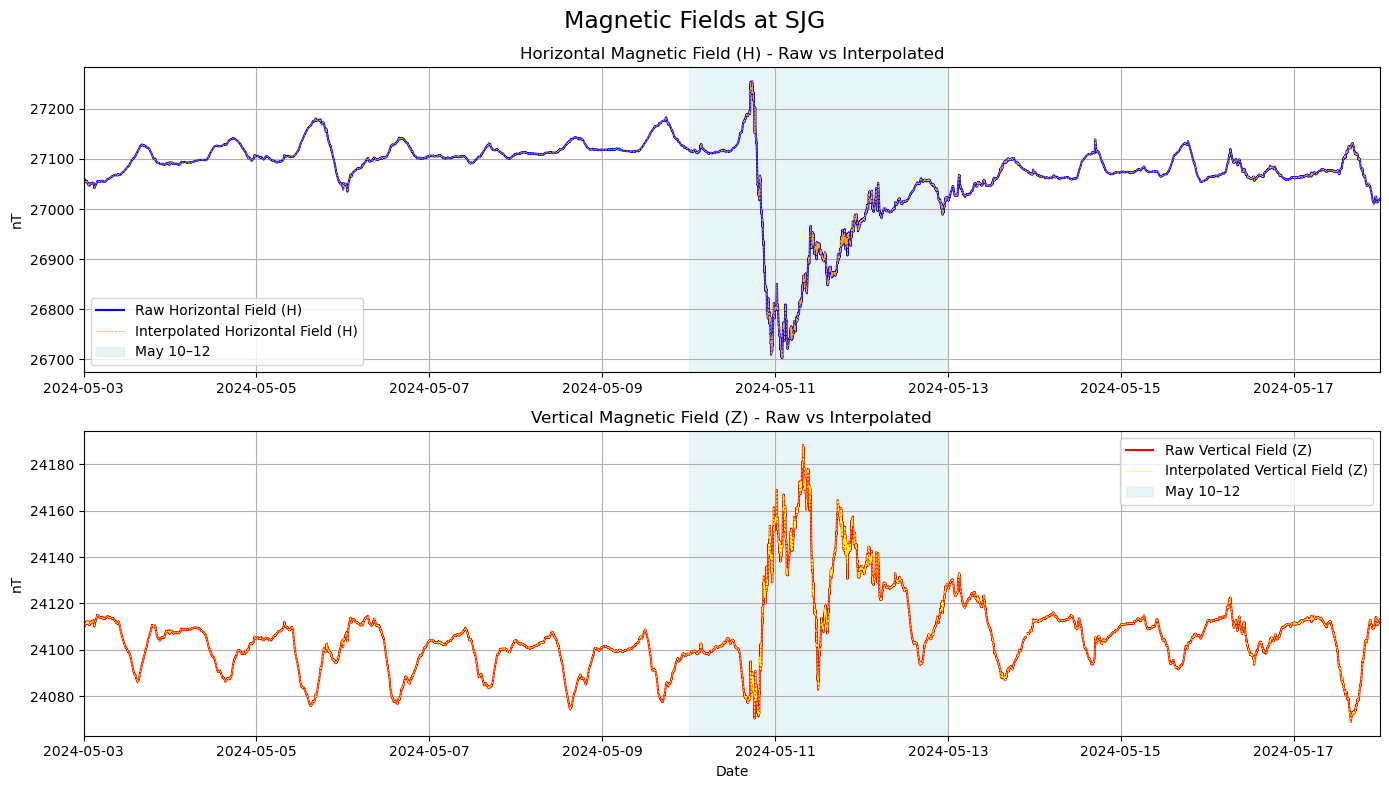

In [84]:
# Load the JSON data
with open("intermag-data/SJG20240503.json", "r") as f:
    raw_data = json.load(f)

# Extract relevant fields
times = [datetime.fromisoformat(t.replace("Z", "")) for t in raw_data["datetime"]]  # Convert datetime strings to datetime objects
X = np.array(raw_data["X"], dtype=float)
Y = np.array(raw_data["Y"], dtype=float)
Z = np.array(raw_data["Z"], dtype=float)

# Convert to pandas DataFrame for easier handling
df_EYR = pd.DataFrame({
    'time': times,
    'X': X,
    'Y': Y,
    'Z': Z
})

# Set the time as the index
df_EYR.set_index('time', inplace=True)

# Interpolate missing (NaN) values using linear interpolation
df_EYR_inter = df_EYR.interpolate(method='linear', axis=0)

# Calculate horizontal field strength (H) for both raw and interpolated data
H_EYR_raw = np.sqrt(X**2 + Y**2)
H_EYR_interpolated = np.sqrt(df_EYR_inter['X']**2 + df_EYR_inter['Y']**2)

# Plot the raw vs. interpolated data
plt.figure(figsize=(14, 8))

# Raw Horizontal field
plt.subplot(2, 1, 1)
plt.plot(times, H_EYR_raw, label='Raw Horizontal Field (H)', color='blue')
plt.plot(df_EYR_inter.index, H_EYR_interpolated, label='Interpolated Horizontal Field (H)', color='orange', linestyle='--', linewidth=0.5)
plt.ylabel('nT')
plt.title('Horizontal Magnetic Field (H) - Raw vs Interpolated')
plt.xlim(datetime(2024, 5, 3), datetime(2024, 5, 18))
# Highlight May 10 to May 12
start_highlight = pd.to_datetime('2024-05-10')
end_highlight = pd.to_datetime('2024-05-12 23:59:59')
plt.axvspan(start_highlight, end_highlight, color='powderblue', alpha=0.3, label='May 10–12')
plt.legend()
plt.grid(True)

# Raw Vertical field
plt.subplot(2, 1, 2)
plt.plot(times, Z, label='Raw Vertical Field (Z)', color='red')
plt.plot(df_EYR_inter.index, df_EYR_inter['Z'], label='Interpolated Vertical Field (Z)', color='yellow', linestyle='--', linewidth=0.5)
plt.ylabel('nT')
plt.title('Vertical Magnetic Field (Z) - Raw vs Interpolated')
plt.xlabel('Date')
plt.xlim(datetime(2024, 5, 3), datetime(2024, 5, 18))
# Highlight May 10 to May 12
plt.axvspan(start_highlight, end_highlight, color='powderblue', alpha=0.3, label='May 10–12')
plt.legend()
plt.grid(True)

plt.suptitle("Magnetic Fields at SJG", fontsize=17)
plt.tight_layout()
plt.show()

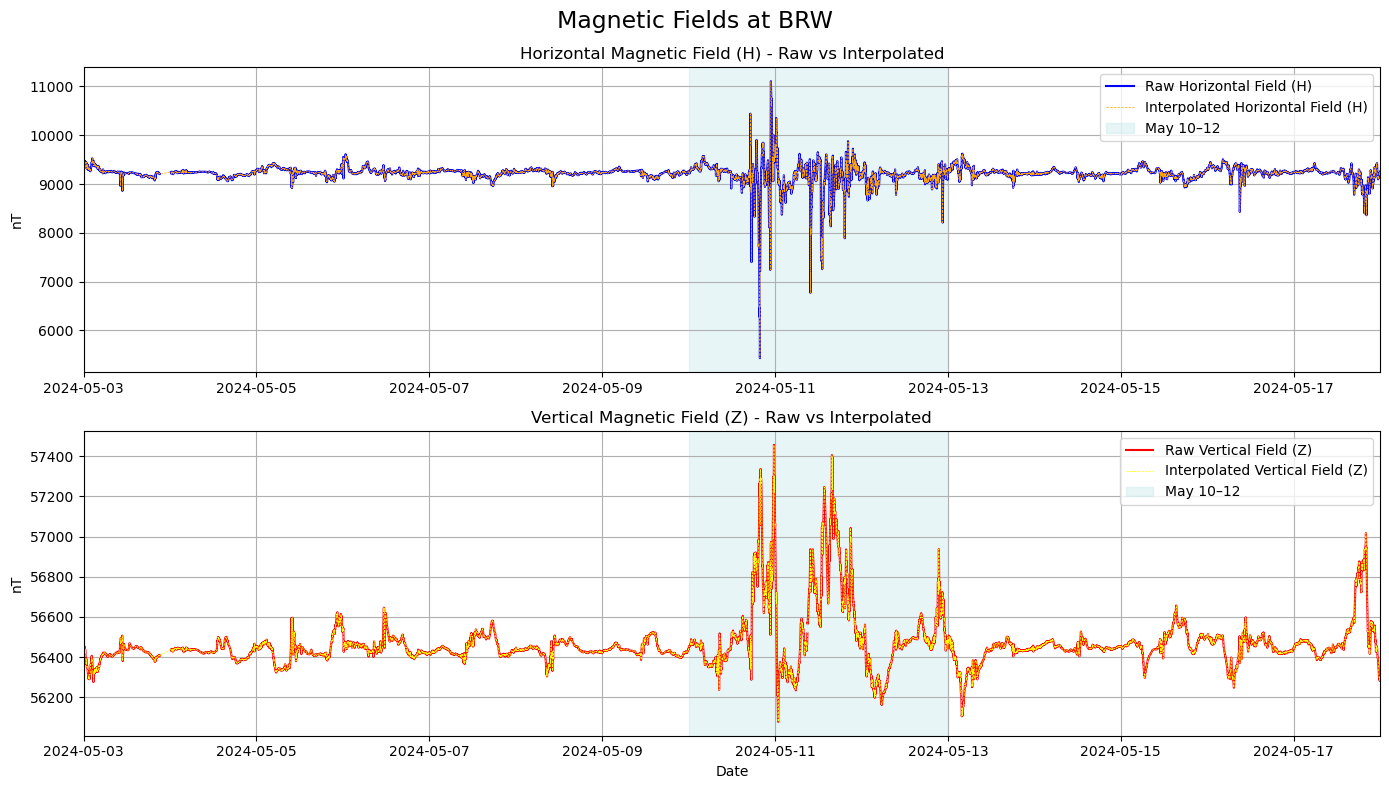

In [83]:
# Load the JSON data
with open("intermag-data/BRW20240503.json", "r") as f:
    raw_data = json.load(f)

# Extract relevant fields
times = [datetime.fromisoformat(t.replace("Z", "")) for t in raw_data["datetime"]]  # Convert datetime strings to datetime objects
X = np.array(raw_data["X"], dtype=float)
Y = np.array(raw_data["Y"], dtype=float)
Z = np.array(raw_data["Z"], dtype=float)

# Convert to pandas DataFrame for easier handling
df_EYR = pd.DataFrame({
    'time': times,
    'X': X,
    'Y': Y,
    'Z': Z
})

# Set the time as the index
df_EYR.set_index('time', inplace=True)

# Interpolate missing (NaN) values using linear interpolation
df_EYR_inter = df_EYR.interpolate(method='linear', axis=0)

# Calculate horizontal field strength (H) for both raw and interpolated data
H_EYR_raw = np.sqrt(X**2 + Y**2)
H_EYR_interpolated = np.sqrt(df_EYR_inter['X']**2 + df_EYR_inter['Y']**2)

# Plot the raw vs. interpolated data
plt.figure(figsize=(14, 8))

# Raw Horizontal field
plt.subplot(2, 1, 1)
plt.plot(times, H_EYR_raw, label='Raw Horizontal Field (H)', color='blue')
plt.plot(df_EYR_inter.index, H_EYR_interpolated, label='Interpolated Horizontal Field (H)', color='orange', linestyle='--', linewidth=0.5)
plt.ylabel('nT')
plt.title('Horizontal Magnetic Field (H) - Raw vs Interpolated')
plt.xlim(datetime(2024, 5, 3), datetime(2024, 5, 18))
# Highlight May 10 to May 12
start_highlight = pd.to_datetime('2024-05-10')
end_highlight = pd.to_datetime('2024-05-12 23:59:59')
plt.axvspan(start_highlight, end_highlight, color='powderblue', alpha=0.3, label='May 10–12')
plt.legend()
plt.grid(True)


# Raw Vertical field
plt.subplot(2, 1, 2)
plt.plot(times, Z, label='Raw Vertical Field (Z)', color='red')
plt.plot(df_EYR_inter.index, df_EYR_inter['Z'], label='Interpolated Vertical Field (Z)', color='yellow', linestyle='--', linewidth=0.5)
plt.ylabel('nT')
plt.title('Vertical Magnetic Field (Z) - Raw vs Interpolated')
plt.xlabel('Date')
plt.xlim(datetime(2024, 5, 3), datetime(2024, 5, 18))
# Highlight May 10 to May 12
plt.axvspan(start_highlight, end_highlight, color='powderblue', alpha=0.3, label='May 10–12')
plt.legend()
plt.grid(True)

plt.suptitle("Magnetic Fields at BRW", fontsize=17)
plt.tight_layout()
plt.show()

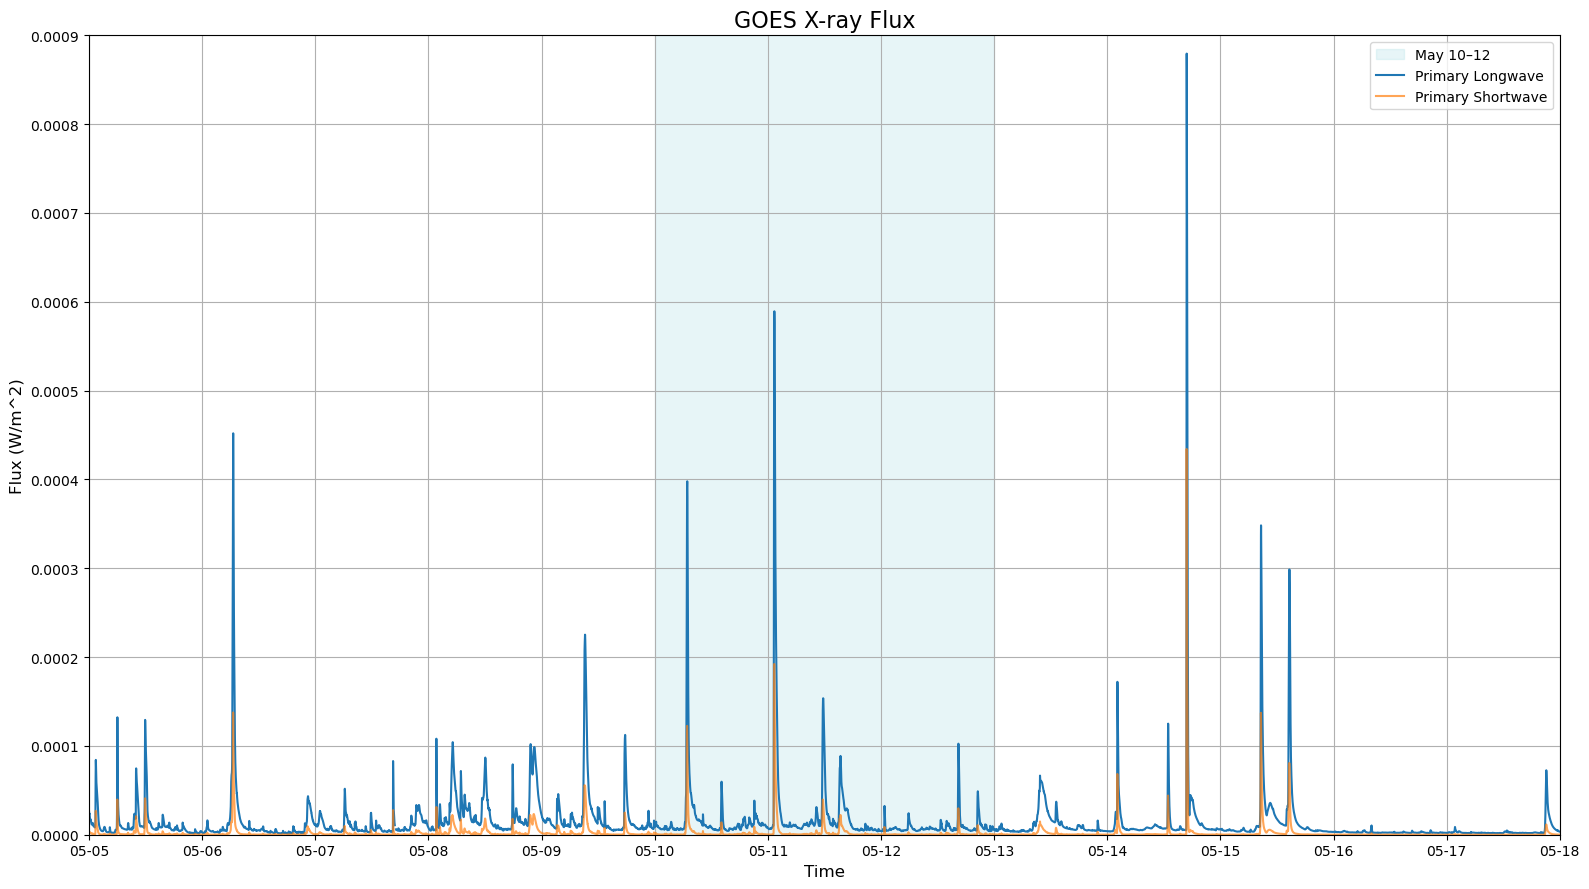

In [86]:
# Load the data
df1 = pd.read_csv('misc-data/goes-x-ray-flux.csv')

# Clean column names (remove double spaces)
df1.columns = [col.strip().replace('  ', ' ') for col in df1.columns]

# Convert time column to datetime
df1['Universal Time'] = pd.to_datetime(df1['Universal Time'])

# Set time as the index
df1.set_index('Universal Time', inplace=True)

# Set x-axis ticks to daily
plt.figure(figsize=(16, 9))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# Highlight May 10 to May 12
start_highlight = pd.to_datetime('2024-05-10')
end_highlight = pd.to_datetime('2024-05-12 23:59:59')
plt.axvspan(start_highlight, end_highlight, color='powderblue', alpha=0.3, label='May 10–12')

# Plot Longwave and Shortwave flux
plt.xlim(datetime(2024, 5, 5), datetime(2024, 5, 18))
plt.ylim(0, 0.0009)
plt.plot(df1.index, df1['GOES primary Longwave'], label='Primary Longwave')
plt.plot(df1.index, df1['GOES primary Shortwave'], label='Primary Shortwave', alpha=0.7)
plt.title('GOES X-ray Flux', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Flux (W/m^2)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()